In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\JD\Desktop\Python\BrainBody.csv')

In [3]:
df.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
df.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [5]:
#elimino valori molto diversi

df=df[df.body<200]

In [6]:
import seaborn as sns

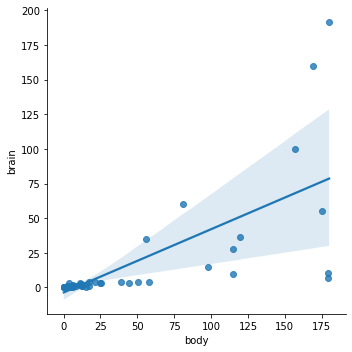

In [7]:
sns.lmplot(x='body',y='brain',data=df)

In [8]:
import numpy as np

In [9]:
#creo colonna con valori casuali di 1 e 2 (divido in set di collaudo)

df['sample']=np.random.randint(1,3,len(df))

In [10]:
df.head()

,brain,body,sample
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,1
5,27.660,115.0,2


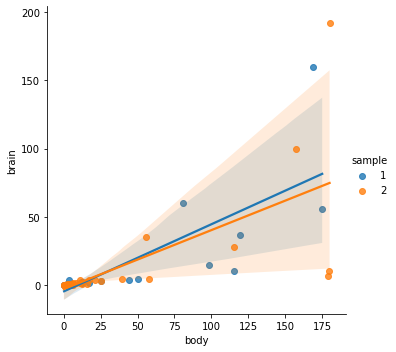

In [11]:
#grafico con i due set

sns.lmplot(x='body',y='brain',hue='sample',data=df)

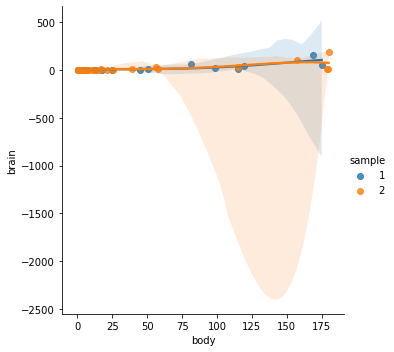

In [12]:
#imposto curva polinomiale di 4° grado (come regressione lineare)

sns.lmplot(x='body',y='brain',hue='sample',order=4,data=df)

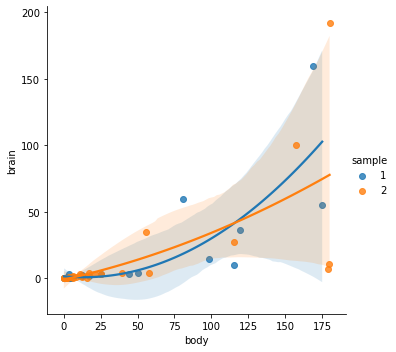

In [13]:
#abbasso il grado

sns.lmplot(x='body',y='brain',hue='sample',order=2,data=df)

In [14]:
#aumentando la complessità del modello bias (differenza tra previsto e reale) diminuisce ma cresce varianza.
#qual'è il punto ottimale della complessità del modello?

# Convalida incrociata

In [15]:
from sklearn import datasets

In [16]:
iris=datasets.load_iris()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [18]:
x=iris.data
y=iris.target

knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [19]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score

In [20]:
#accuratezza

cvs(knn,x,y,cv=5).mean()

0.96

In [21]:
#aumento la complessità del modello

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

KNeighborsClassifier()

In [22]:
#accuratezza con neighbors 5

cvs(knn,x,y,cv=5).mean()

0.9733333333333334

In [23]:
#accuratezza è aumentata

In [24]:
#quale valore ottimale?

In [25]:
errors=[]
rang=[]
for k in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cvs(knn,x,y,cv=5)
    error=1-(score.mean())
    errors.append(error)
    rang.append(k)

In [26]:
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [27]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=rang,y=errors,marker_color='cyan'))
fig.update_layout(title='andamento errore in base alla complessità',
                 xaxis_title='complessità',
                 yaxis_title='errore',
                 plot_bgcolor='white')
fig.update_xaxes(linecolor='lightgrey',gridcolor='lightgrey')
fig.update_yaxes(linecolor='lightgrey',gridcolor='lightgrey')
fig.show()

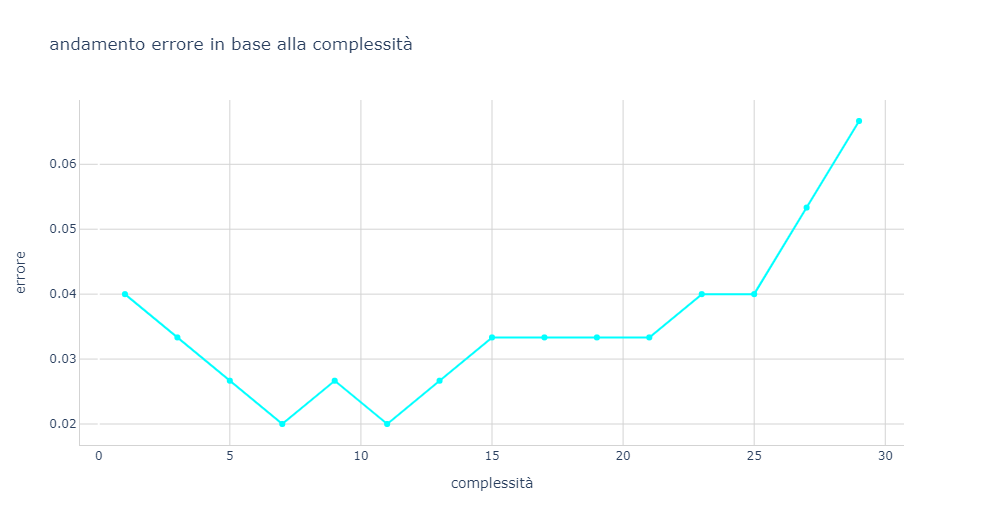

In [28]:
#valore ottimale complessità tra 7 e 11